<a href="https://colab.research.google.com/github/yohan2001colombo/DataScience/blob/main/Brownian_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
#!pip install kaggle
from google.colab import files
data = files.upload()

Saving Talawakelle Tea Estate Stock Price History.csv to Talawakelle Tea Estate Stock Price History.csv


In [5]:
import pandas as pd
df = pd.read_csv("Talawakelle Tea Estate Stock Price History.csv")
print(df.head())

        Date  Closing Price
0  10/3/2022           98.8
1  10/4/2022           94.5
2  10/5/2022           98.7
3  10/6/2022           98.5
4  10/7/2022          100.0


In [8]:
len(df)

480

In [16]:
# a)
df["time_index"] = range(len(df))  # Starts at 0, increments by 1

In [17]:
df.head()

,Date,Closing Price,time_index
0,10/3/2022,98.8,0
1,10/4/2022,94.5,1
2,10/5/2022,98.7,2
3,10/6/2022,98.5,3
4,10/7/2022,100.0,4


In [39]:
log_returns = np.log(df["Closing Price"]/df["Closing Price"].shift(1)).dropna()

In [42]:
sigma_2 = np.var(log_returns)
mu = np.mean(log_returns) + sigma_2/2

In [43]:
# b)
print(f"Scale parameter: {np.sqrt(sigma_2):.4f}")
print(f"Drift parameter mu: {mu:.4f}")

Scale parameter: 0.0251
Drift parameter mu: 0.0008


In [45]:
# c)
# (A) Normality test
shapiro_stat, p_value = shapiro(log_returns)
print(f"Shapiro-Wilk p-value: {p_value:.4f}")  # p < 0.05 → not normal


Shapiro-Wilk p-value: 0.0000


Shapiro-Wilk p-value of 0.0000 for TPL's log returns provides strong statistical evidence against normality

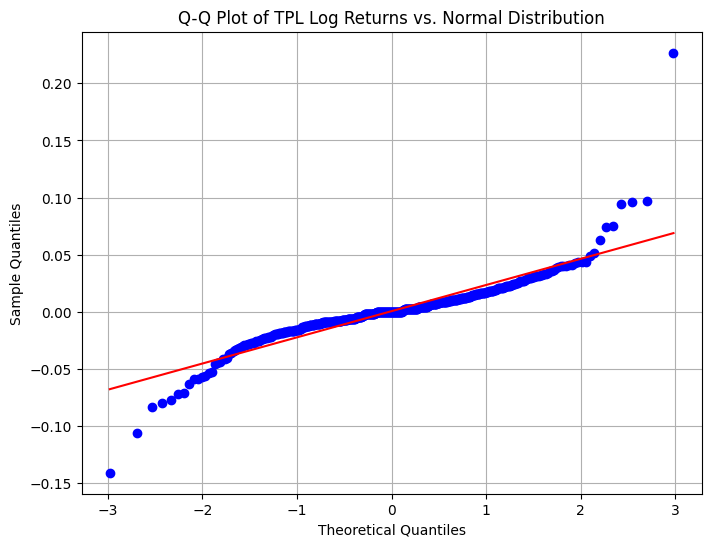

In [50]:
# Generate Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(log_returns, dist="norm", plot=plt)
plt.title("Q-Q Plot of TPL Log Returns vs. Normal Distribution")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid()
plt.show()

GBM is inappropriate for TPL’s closing prices because:

* GBM assumes log returns are normally distributed, but TPL’s returns violate this.


<Figure size 1000x400 with 0 Axes>

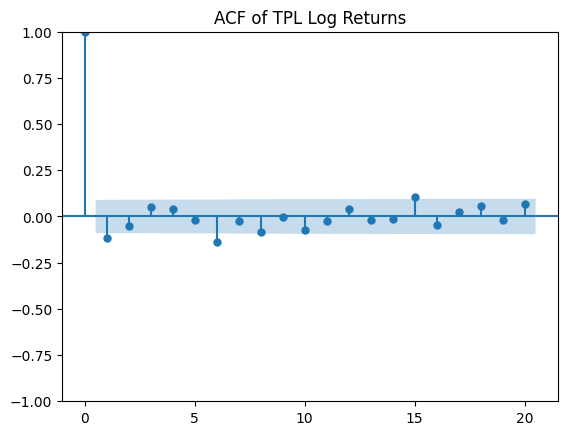

In [56]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 4))
plot_acf(log_returns, lags=20, alpha=0.05, title="ACF of TPL Log Returns")
plt.show()

GBM Assumption Violation:

* GBM requires no autocorrelation (independent increments).

* TPL shows significant autocorrelation at multiple lags → GBM is inappropriate.

Market Behavior Suggested by ACF:

* Positive autocorrelation (Lags 1-5):

  * Short-term momentum (past returns influence future returns).

  * Example: If TPL rose yesterday, it’s likely to rise today.

* Negative autocorrelation (Lags 10-20):

  * Long-term mean reversion (overbought/oversold reversals).

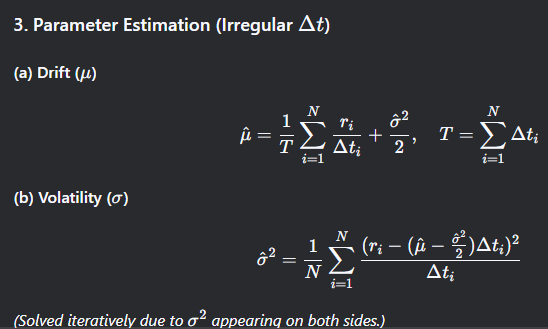

In [ ]:
# Inputs: log_returns = [r1, r2, ...], delta_t = [Δt1, Δt2, ...]
def estimate_gbm_parameters(log_returns, delta_t, max_iter=100, tol=1e-4):
    mu_hat = np.mean(log_returns) / np.mean(delta_t)
    sigma2_hat = np.var(log_returns) / np.mean(delta_t)

    for i in range(max_iter):
        adj_returns = log_returns - (mu_hat - 0.5 * sigma2_hat) * delta_t
        new_sigma2 = np.mean(adj_returns**2 / delta_t)
        if abs(new_sigma2 - sigma2_hat) < tol:
            break
        sigma2_hat = new_sigma2
        mu_hat = np.mean(log_returns / delta_t) + 0.5 * sigma2_hat

    return mu_hat, np.sqrt(sigma2_hat)

In [ ]:
mu_hat = estimate_gbm_parameters(df["log_returns"], df["delta_t"])[0]
sigma_hat = estimate_gbm_parameters(df["log_returns"], df["delta_t"])[1]

There are two assumptions must
be satisfied for GBM process. There are normality of
the log ratios and the independence from the previous
data.

In [ ]:
# Standardized returns (should be ~N(0,1) if GBM holds)
log_returns = df["log_returns"]
delta_t = df["delta_t"]

z = (log_returns - (mu_hat - 0.5 * sigma_hat**2) * delta_t) / (sigma_hat * np.sqrt(delta_t))


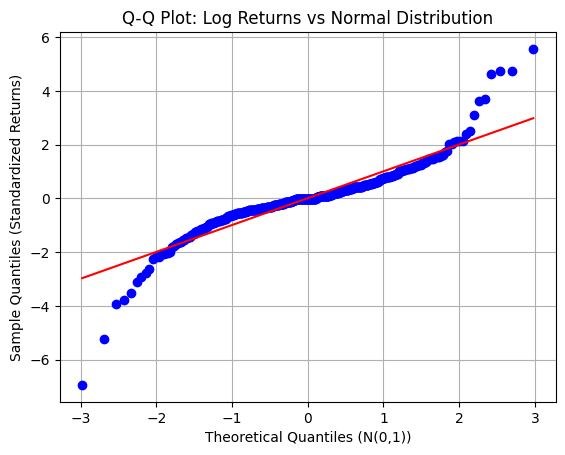

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

stats.probplot(z, dist="norm", plot=plt)
plt.title("Q-Q Plot: Log Returns vs Normal Distribution")
plt.xlabel("Theoretical Quantiles (N(0,1))")
plt.ylabel("Sample Quantiles (Standardized Returns)")
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import shapiro
_, p_value = shapiro(z)
print(f"Normality p-value: {p_value}")  # p > 0.05 → Normal

Normality p-value: 8.527533227521388e-20
